# A Wilson-Cowan model with subtractive and divisive inhibition

In this notebook, the basic use of the implementation of the subtractive/divisive Wilson-Cowan (`subdivwc`) model is presented. 

In the `subdivwc` model, the activity of a particular brain region is defined by a coupled system of one excitatory (E) and two inhibitory (I_s, I_d) neuronal populations with the mean firing rates of the pools being the dynamic variables. Additionally, the somatic inhibition can perform subtractive and divisive inhibition or a mixture of both. The implementation of the model follows Papasavvas et al., *Divisive gain modulation enables flexible and rapid entrainment in a neocortical microcircuit model*, J. Neurophysiol., 2020

In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from neurolib.models.subdivwc import SubDivWCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

# Bifurcation diagram - Purely subtractive inhibition

In [4]:
subdivwc = SubDivWCModel()
subdivwc.params['duration'] = 2.0*1000
subdivwc.params['q'] = 0. # purely subtratcive inhibition

Let's draw a simple one-dimensional bifurcation diagram of this model to orient ourselves in the parameter space

In [5]:
max_exc = []
min_exc = []
# these are the different input values that we want to scan
exc_inputs = np.linspace(0, 3.5, 50)
for exc_ext in exc_inputs:
    # Note: this has to be a vector since it is input for all nodes
    # (but we have only one node in this example)
    subdivwc.params['exc_ext'] = [exc_ext]
    subdivwc.run()
    # we add the maximum and the minimum of the last second of the 
    # simulation to a list
    max_exc.append(np.max(subdivwc.exc[0, -int(1000/subdivwc.params['dt']):]))
    min_exc.append(np.min(subdivwc.exc[0, -int(1000/subdivwc.params['dt']):]))

/home/christoph/.local/lib/python3.6/site-packages/numba/ir_utils.py:2041: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'exc_ext' of function 'timeIntegration_njit_elementwise'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "neurolib/models/subdivwc/timeIntegration.py", line 184:
@numba.njit
def timeIntegration_njit_elementwise(
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


Text(0,0.5,'Min / max exc')

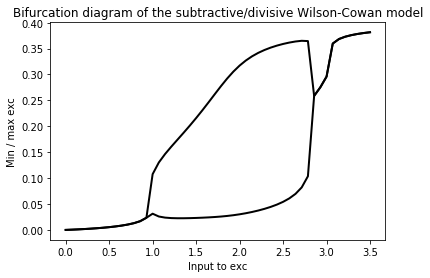

In [6]:
plt.plot(exc_inputs, max_exc, c='k', lw = 2)
plt.plot(exc_inputs, min_exc, c='k', lw = 2)
plt.title("Bifurcation diagram of the subtractive/divisive Wilson-Cowan model")
plt.xlabel("Input to exc")
plt.ylabel("Min / max exc")

# Bifurcation diagram - Purely divisive inhibition

In [7]:
subdivwc = SubDivWCModel()
subdivwc.params['duration'] = 2.0*1000
subdivwc.params['q'] = 1. # purely divisive inhibition!

Let's draw the simple one-dimensional bifurcation diagram of this model again.

In [8]:
max_exc = []
min_exc = []
# these are the different input values that we want to scan
exc_inputs = np.linspace(0, 3.5, 50)
for exc_ext in exc_inputs:
    # Note: this has to be a vector since it is input for all nodes
    # (but we have only one node in this example)
    subdivwc.params['exc_ext'] = [exc_ext]
    subdivwc.run()
    # we add the maximum and the minimum of the last second of the 
    # simulation to a list
    max_exc.append(np.max(subdivwc.exc[0, -int(1000/subdivwc.params['dt']):]))
    min_exc.append(np.min(subdivwc.exc[0, -int(1000/subdivwc.params['dt']):]))

Text(0,0.5,'Min / max exc')

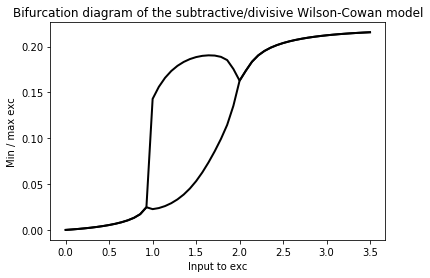

In [9]:
plt.plot(exc_inputs, max_exc, c='k', lw = 2)
plt.plot(exc_inputs, min_exc, c='k', lw = 2)
plt.title("Bifurcation diagram of the subtractive/divisive Wilson-Cowan model")
plt.xlabel("Input to exc")
plt.ylabel("Min / max exc")

# Single node simulation

In [10]:
subdivwc = SubDivWCModel()
subdivwc.params['duration'] = 1.0*1000
subdivwc.params['sigma_ou'] = 0.01

subdivwc.run()

Text(0,0.5,'Activity')

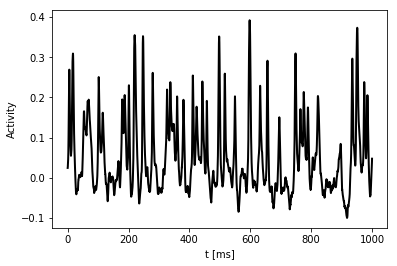

In [11]:
plt.plot(subdivwc.t, subdivwc.exc.T, c='k', lw = 2)
plt.xlabel("t [ms]")
plt.ylabel("Activity")

# Brain network

In [12]:
from neurolib.utils.loadData import Dataset

ds = Dataset("hcp")

In [13]:
subdivwc = SubDivWCModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

In [14]:
subdivwc.params['exc_ext'] = [0.65] * subdivwc.params['N']

subdivwc.params['signalV'] = 0
subdivwc.params['duration'] = 20 * 1000 
subdivwc.params['sigma_ou'] = 0.14
subdivwc.params['K_gl'] = 3.15


subdivwc.run(chunkwise=True)

(0, 200)

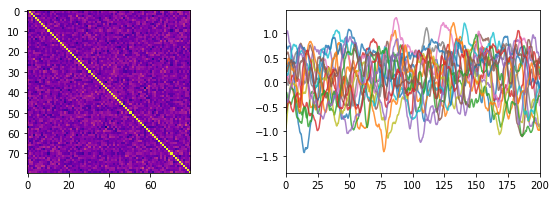

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].imshow(func.fc(subdivwc.exc[:, -10000:]))
axs[1].plot(subdivwc.t, subdivwc.exc[::5, :].T, alpha=0.8);
axs[1].set_xlim(0, 200)

In [16]:
scores = [func.matrix_correlation(func.fc(subdivwc.exc[:, -int(5000/subdivwc.params['dt']):]), fcemp) for fcemp in ds.FCs]
print("Correlation per subject:", [f"{s:.2}" for s in scores])
print("Mean FC/FC correlation: {:.2f}".format(np.mean(scores)))

Correlation per subject: ['0.02', '0.015', '0.011', '0.0081', '0.0047', '0.019', '0.02']
Mean FC/FC correlation: 0.01
